In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def random_points_in_cylinder(n, radius, height):
    """
    Generate random points within a cylinder.

    Parameters:
    n (int): Number of random points to generate.
    radius (float): Radius of the cylinder.
    height (float): Height of the cylinder.

    Returns:
    numpy.ndarray: An array of shape (n, 3) containing the random points.
                   Each point is represented by its (x, y, z) coordinates.
    """
    rs = radius * np.sqrt(np.random.rand(n))
    thetas = 2 * np.pi * np.random.rand(n)
    zs = height * np.random.rand(n)
    return np.column_stack((rs * np.cos(thetas), rs * np.sin(thetas), zs))

# concentration functions

In [3]:
def box_char_func_np(x, x0, x1, y0, y1, z0, z1):
    """
    Determines if points in a NumPy array are within a specified 3D box.

    Parameters:
    x (np.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The minimum x-coordinate of the box.
    x1 (float): The maximum x-coordinate of the box.
    y0 (float): The minimum y-coordinate of the box.
    y1 (float): The maximum y-coordinate of the box.
    z0 (float): The minimum z-coordinate of the box.
    z1 (float): The maximum z-coordinate of the box.

    Returns:
    np.ndarray: A 1D boolean array of length n where each element is True if the corresponding point is within the box, and False otherwise.
    """
    return np.logical_and.reduce((x[:, 0] >= x0, x[:, 0] <= x1, x[:, 1] >= y0, x[:, 1] <= y1, x[:, 2] >= z0, x[:, 2] <= z1))


In [4]:
def unif_concentration(x, a):
    """
    Generates a uniform concentration array.

    Parameters:
    x (numpy.ndarray): An array whose shape will be used to determine the size of the output array.
    a (float): The value to fill the output array with.

    Returns:
    numpy.ndarray: An array of the same length as the first dimension of `x`, filled with the value `a`.
    """
    return np.full(x.shape[0], a)

In [5]:
def clip(x, min_val, max_val):
    """
    Clips (limits) the values in an array.

    Parameters:
    x (numpy.ndarray): The array to clip.
    min_val (float): The minimum value to allow in the array.
    max_val (float): The maximum value to allow in the array.

    Returns:
    numpy.ndarray: A new array clipped so that all values are between `min_val` and `max_val`.
    """
    return np.clip(x, min_val, max_val)

In [6]:
def vertical_linear_gradient_dist(x, z_0, z_1, c_0, c_1):
    """
    Generates a linear gradient in the vertical direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    z_0 (float): The minimum z-coordinate of the gradient.
    z_1 (float): The maximum z-coordinate of the gradient.
    c_0 (float): The value of the gradient at z=z_0.
    c_1 (float): The value of the gradient at z=z_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    _ = c_0 + (c_1 - c_0) * (x[:, 2] - z_0) / (z_1 - z_0)
    return np.clip(_, c_0, c_1)
    return _

In [7]:
def radial_linear_gradient_dist(x, r_0, r_1, c_0, c_1):
    """
    Generates a linear gradient in the radial direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    r_0 (float): The minimum radial distance of the gradient.
    r_1 (float): The maximum radial distance of the gradient.
    c_0 (float): The value of the gradient at r=r_0.
    c_1 (float): The value of the gradient at r=r_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    r = np.linalg.norm(x[:, :2], axis=1)
    _ = c_0 + (c_1 - c_0) * (r - r_0) / (r_1 - r_0)
    return np.clip(_, c_0, c_1)

# Slice inspection

In [8]:
def xy_slice_inspect(ax, conc_func, x0, x1, y0, y1, z=.5, n=100, v_min=0, v_max=1):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    x0 (float): The minimum x-coordinate of the slice.
    x1 (float): The maximum x-coordinate of the slice.
    y0 (float): The minimum y-coordinate of the slice.
    y1 (float): The maximum y-coordinate of the slice.
    z (float): The z-coordinate of the slice.
    n (int): The number of points to sample in the x and y directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    x = np.linspace(x0, x1, n)
    y = np.linspace(y0, y1, n)
    xx, yy = np.meshgrid(x, y)
    zz = np.full_like(xx, z)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    im = ax.contourf(xx, yy, conc, levels=20, cmap='viridis', alpha=0.5, vmin=v_min, vmax=v_max)

    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_aspect('equal')
    
    return conc

In [9]:
def yz_slice_inspect(ax, conc_func, y0, y1, z0, z1, x=.5, n=100, v_min=0, v_max=1):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    y0 (float): The minimum y-coordinate of the slice.
    y1 (float): The maximum y-coordinate of the slice.
    z0 (float): The minimum z-coordinate of the slice.
    z1 (float): The maximum z-coordinate of the slice.
    x (float): The x-coordinate of the slice.
    n (int): The number of points to sample in the y and z directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    y = np.linspace(y0, y1, n)
    z = np.linspace(z0, z1, n)
    yy, zz = np.meshgrid(y, z)
    xx = np.full_like(yy, x)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    im = ax.contourf(yy, zz, conc, levels=20, cmap='viridis', alpha=0.5, vmin=v_min, vmax=v_max)

    ax.set_xlim(y0, y1)
    ax.set_ylim(z0, z1)
    ax.set_aspect('equal')
    
    return conc

In [10]:
def xz_slice_inspect(ax, conc_func, x0, x1, z0, z1, y=.5, n=100, v_min=0, v_max=1):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    x0 (float): The minimum x-coordinate of the slice.
    x1 (float): The maximum x-coordinate of the slice.
    z0 (float): The minimum z-coordinate of the slice.
    z1 (float): The maximum z-coordinate of the slice.
    y (float): The y-coordinate of the slice.
    n (int): The number of points to sample in the x and z directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    x = np.linspace(x0, x1, n)
    z = np.linspace(z0, z1, n)
    xx, zz = np.meshgrid(x, z)
    yy = np.full_like(xx, y)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    im = ax.contourf(xx, zz, conc, levels=20, cmap='viridis', alpha=0.5, vmin=v_min, vmax=v_max)

    ax.set_xlim(x0, x1)
    ax.set_ylim(z0, z1)
    ax.set_aspect('equal')
    
    return conc

# Pick the core points and sample points inside the cylinders

In [11]:
def grid_no_corners(n, x0, x1, y0, y1):
    """
    Generate a grid of points with no corners.

    Parameters:
    n (int): The number of points along each dimension of the grid.

    Returns:
    numpy.ndarray: An array of shape (n*n, 3) where each row represents a point in 3D space.
    """
    _x = np.linspace(x0, x1, n+2)[1:-1]
    _y = np.linspace(y0, y1, n+2)[1:-1]
    _xx, _yy = np.meshgrid(_x, _y)
    _xx = _xx.flatten()
    _yy = _yy.flatten()
    _z = np.zeros(len(_xx))
    return np.column_stack((_xx, _yy, _z))

def cyl_loc_gen(core_locs, vertical_core_slices):
    """
    Generate cylinder locations for each core.

    Parameters:
    core_locs (numpy.ndarray): An array of shape (n, 3) where each row represents the center of a core.
    vertical_core_slices (int): The number of slices in each core.

    Returns:
    numpy.ndarray: An array of shape (n*vertical_core_slices, 3) where each row represents the top of the cyls in 3D space.
    """
    cyl_locs = np.repeat(core_locs, vertical_core_slices, axis=0)
    cyl_locs[:, 2] = np.tile(np.linspace(soil_z0, soil_z1, vertical_core_slices), len(core_locs))
    return cyl_locs


In [12]:
def sample_cyl_locs(cyl_locs, n_samples_per_cyl, core_radius, core_height, vertical_core_slices):
    """
    Generate a grid of points with no corners.

    Parameters:
    cyl_locs (numpy.ndarray): An array of shape (n, 3) where each row represents the center of a core.
    n_samples_per_cyl (int): The number of points to sample in each core.

    Returns:
    numpy.ndarray: An array of shape (n*n_samples_per_cyl, 3) where each row represents a point in 3D space.
    """
    cyl_points = np.zeros((len(cyl_locs), n_samples_per_cyl, 3))
    for i, loc in enumerate(cyl_locs):
        cyl_points[i] = random_points_in_cylinder(n_samples_per_cyl, core_radius, core_height/vertical_core_slices) + loc
    return cyl_points

In [13]:
def cyl_means(cyl_points, conc_func):
    """
    Generate cylinder locations for each core.

    Parameters:
    cyl_points (numpy.ndarray): An array of shape (n, m, 3) where each row represents the center of a core.

    Returns:
    numpy.ndarray: An array of shape (n) where each element represents the mean concentration of the core.
    """
    return np.array([np.mean(conc_func(core_points)) for core_points in cyl_points])

# Example Use

In [14]:
soil_x0 = -1
soil_x1 = 1
soil_y0 = -1
soil_y1 = 1
soil_z0 = -2
soil_z1 = 0

# conc_func = lambda x: 1-radial_linear_gradient_dist(x, 0, 1, 0, .2)
conc_func = lambda x: vertical_linear_gradient_dist(x, soil_z0, soil_z1, 0, 1)
# conc_func = lambda x: unif_concentration(x, .2)

v_min = 0 # Minimum value for the concentration for plotting
v_max = 1 # Maximum value for the concentration for plotting

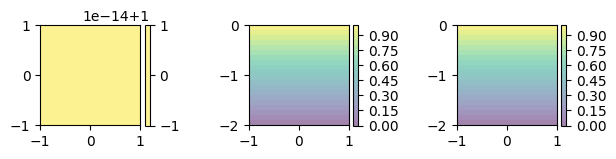

In [15]:
fig = plt.figure()
axs = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
xy_conc = xy_slice_inspect(axs[0], conc_func, soil_x0, soil_x1, soil_y0, soil_y1, soil_z1, 100, v_min, v_max)
yz_conc = yz_slice_inspect(axs[1], conc_func, soil_y0, soil_y1, soil_z0, soil_z1, 0, 100, v_min, v_max)
xz_conc = xz_slice_inspect(axs[2], conc_func, soil_x0, soil_x1, soil_z0, soil_z1, 0, 100, v_min, v_max)

for ax in axs:
    fig.colorbar(ax.collections[0], ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()

plt.show()

In [20]:
core_height = 1
core_radius = .05
vertical_core_slices = 5

core_locs = grid_no_corners(4, soil_x0, soil_x1, soil_y0, soil_y1)
cyl_locs = cyl_loc_gen(core_locs, vertical_core_slices)

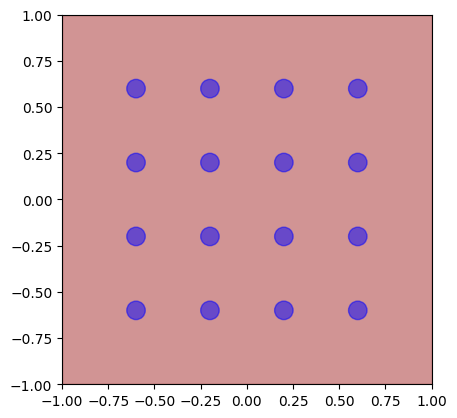

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.fill_between([soil_x0, soil_x1], soil_y0, soil_y1, color='brown', alpha=0.5)
for _x, _y in core_locs[:, :2]:
    circle = plt.Circle((_x, _y), core_radius, color='blue', alpha=0.5)
    ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
plt.show()

In [22]:
cyl_points = sample_cyl_locs(cyl_locs, 1000, core_radius, core_height, vertical_core_slices)
cyl_m = cyl_means(cyl_points, conc_func)

from scipy.interpolate import Rbf
rbf = Rbf(cyl_locs[:, 0], cyl_locs[:, 1], cyl_locs[:, 2], cyl_m, function='linear')

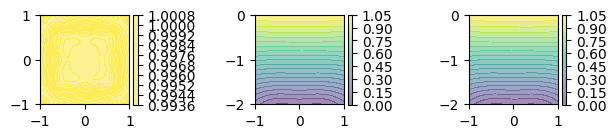

In [23]:
interp_conc_func = lambda x: rbf(x[:, 0], x[:, 1], x[:, 2])
resolution = 100

fig = plt.figure()
axs = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]
xy_conc = xy_slice_inspect(axs[0], interp_conc_func, soil_x0, soil_x1, soil_y0, soil_y1, 0, resolution, v_min, v_max)
yz_conc = yz_slice_inspect(axs[1], interp_conc_func, soil_y0, soil_y1, soil_z0, soil_z1, 0, resolution, v_min, v_max)
xz_conc = xz_slice_inspect(axs[2], interp_conc_func, soil_x0, soil_x1, soil_z0, soil_z1, 0, resolution, v_min, v_max)
for ax in axs:
    fig.colorbar(ax.collections[0], ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()